In [1]:
# from IPython.core.display import display, HTML
# display(HTML("<style>.container { width:100% !important; }</style>"))

In [1]:
import warnings
warnings.filterwarnings('ignore')

from qclib import by_date
# from nsasci.visual_tests import quicklooks
# import sqlite3

# %matplotlib widget

import matplotlib.colors as mplcol

from ipywidgets import widgets

In [2]:
import atmPy.aerosols.physics.column_optical_properties as atmco

# Requirements

## Data
* Currently the data has to be daily data

# multiple datasets on multiple axis

## define load and plot functions

In [3]:
path2date_function = lambda path: pd.to_datetime(path.name.split('_')[-1].split('.')[-2])

def read_function_AOD(path2file):
    """function that takes the path to the file and returns an object that the plot function can turn into a plot"""
    # out = path2file.apply(lambda e: xr.open_dataset(e)
    #            )
    out = xr.open_dataset(path2file)
    return out

def read_function_ceil(path2file):
    da = xr.open_dataset(path2file).backscatter_profile
    # ds = data.active_data.loc['ceil']
    da = da.resample(time = '10min').mean()
    da = da.coarsen(range = 2).mean()
    
    cutofftime = 12
    cutofftime = pd.to_datetime(pd.to_datetime(da.time.values[0]).date())  + pd.to_timedelta(cutofftime, 'h')
    da = da.where(da.time > cutofftime)
    da = da.dropna('time')
    return da

def read_function_HRRR(path2file):
    """function that takes the path to the file and returns an object that the plot function can turn into a plot"""
    # out = path2file.apply(lambda e: xr.open_dataset(e)
    #            )
    out = xr.open_dataset(path2file)
    return out

In [4]:
# ds = data.active_data['aod2']

In [5]:
path2date_function = lambda path: pd.to_datetime(path.name.split('_')[-1].split('.')[-2])
path2date_function(pl.Path('/mnt/telg/data/grad/surfrad/aod1625/0.4/tbl/2018/srf_aod1625_tbl_20180101.nc'))

path2date_function = lambda path: pd.to_datetime(path.name.split('_')[-1].split('.')[-2])
path2date_function(pl.Path('/nfs/iftp/aftp/g-rad/surfrad/ceilometer/cl51_cloud_prod_lev0/tbl/2020/tbl.cl51.cloud_prod.20200101.nc'))

path2date_function = lambda path: pd.to_datetime(path.name.split('_')[-1].split('.')[-2])
path2date_function(pl.Path('/mnt/telg/data/grad/surfrad/aod/netcdf/current/tbl/20170101.nc'))

path2date_function = lambda path: pd.to_datetime(path.name.split('_')[-1].split('.')[-2])
path2date_function(pl.Path( '/nfs/stu3data2/Model_data/HRRR/HRRRv4_conus_projected/smoke_at_gml_20210104.nc'))

Timestamp('2021-01-04 00:00:00')

In [6]:
def plot_ang(data_object, a):
    ds = data_object['aod1']
    ds.ang.plot(ax = a, label = 'Ang John')
    
    
    ds = data_object['aod2']
    aod_inst = atmco.AOD_AOT(ds)
    aod_inst.aod2angstrom_exponent(column_1=415, column_2=673,).plot(ax = a, label = 'Ang2 415/673')
    # aod_inst.aod2angstrom_exponent(column_1=500, column_2=673,).plot(ax = a, label = 'Ang2 415/673')
    aod_inst.aod2angstrom_exponent(column_1=500, column_2=870,).plot(ax = a, label = 'Ang2 500/870')
    aod_inst.aod2angstrom_exponent(column_1=500, column_2=1625,).plot(ax = a, label = 'Ang2 500/673')
    # aod_inst.aod2angstrom_exponent(column_1=673, column_2=1625,).plot(ax = a, label = 'Ang2 415/673')
    aod_inst.aod2angstrom_exponent(column_1=870, column_2=1625,).plot(ax = a, label = 'Ang2 870/1625')
    
    a.grid()#axis = 'x')
    a.legend(loc = 3, fontsize = 'small')
    
    a.text(0.01, 0.99, 'SURFRAD Ang', transform = a.transAxes, va='top', ha = 'left', fontsize = 'medium')
    
# a = plt.subplot()
# plot_ang(data.active_data, a)

def plot_cloudmasks(data_object, a):
    ds = data_object['aod1']
    # ds.badmask.plot(ax = a)
    ds.badmaskpad.plot(ax = a, label = 'mine')
    ds.cloudmask.plot(ax = a, label = 'johns')
    a.grid(axis = 'x')
    a.legend(loc = 3, fontsize = 'x-small')
    
    
def plot_function_aod(data_object, a, 
                      # variable = 'aod', 
                      # selection = {'channel': 500},
                     ):
    """
    data_object is a dict!"""
    channel = 500
    variable = 'aod'
    sel = {'wavelength': channel}
    da = data_object['aod1']
    da[variable].sel(sel).plot(ax = a, ls = '-', marker = '.', label = 'aod john')
    # da['cloudmask'].plot(ax = a, ls = '-', marker = '.', label = 'cloudmask')
    
    da = data_object['aod2']
    sel = {'channel': channel}
    dasel = da[variable].sel(sel)
    dasel.plot(ax = a, ls = ':', marker = '.', label = 'aod 2')
    
    lmax = float(dasel.where(dasel != np.inf).max())
    if lmax > 5:
        lmax = 5    
    toll=  lmax * 0.05
    
    sel = {'channel': 1625}
    dasel = da[variable].sel(sel)
    dasel.plot(ax = a, ls = ':', marker = '.', label = 'aod 2 1625')

    a.set_ylim(bottom = -toll, top = lmax + toll)
    a.grid(axis = 'x')
    a.set_title('')
    a.legend(loc = 3, fontsize = 'x-small')
    a.text(0.01, 0.99, 'SURFRAD AOD', transform = a.transAxes, va='top', ha = 'left', fontsize = 'small')

def plot_func_ceil(data_object, a):
    # f,a = plt.subplots()
    ds = data_object['ceil']
    pc = ds.plot(x = 'time', ax = a, add_colorbar = False)
    # pc.set_cmap(plt.cm.inferno_r)
    pc.set_cmap(plt.cm.gnuplot2_r)
    # pc.set_clim(vmin = 0.1)
    pc.set_norm(mplcol.LogNorm(vmin = 1, vmax = 2e4))
    a.set_yscale('log')
    a.set_ylim(bottom = 100)
    a.grid(axis = 'x')
    
def plot_hrrr(data_object, a):
    ds = data_object['hrrr']
    sel = ds.sel(forecast_hour = 1, site = 'TBL')

    # fh 0 had no data for smoke ... had to shift it by one houre
    sel = sel.assign_coords(datetime = sel.datetime + pd.to_timedelta(1, 'h'))

    sel.aerosol_optical_depth.plot(ax = a)
    a.set_ylabel('AOD', color = colors[0])
    at = a.twinx()
    sel.total_cloud_cover.plot(ax = at, color = colors[1])
    at.set_ylabel('Total Cloud cover (%)', color = colors[1])
    a.set_title('')
    at.set_title('')
    a.set_xlabel('')

## doit

In [7]:
path2datafolder    = [['aod2','/mnt/telg/data/grad/surfrad/aod1625/0.4/tbl/2021/',read_function_AOD, path2date_function],
                      ['aod1','/mnt/telg/data/grad/surfrad/aod/netcdf/current/tbl/',read_function_AOD, path2date_function], 
                      ['hrrr','/nfs/stu3data2/Model_data/HRRR/HRRRv4_conus_projected/', read_function_HRRR, path2date_function],
                      ['ceil','/nfs/iftp/aftp/g-rad/surfrad/ceilometer/cl51_cloud_prod_lev0/tbl/2021/', read_function_ceil, path2date_function],
                     ]
plot_function      = {'aod': plot_function_aod, 
                      'ang': plot_ang, 
                      'clouds' : plot_cloudmasks, 
                      'hrrr': plot_hrrr,
                      'ceil': plot_func_ceil}
gridspec_kwargs      = {'hspace': 0}

In [8]:
data = by_date.Data(path2datafolder,
                    # path2date_function,
                    # read_function,
                    plot_function,
                    # dataset_name = dataset_name, 
                    # axis_name = axis_name, 
                    # axis2ploton = axis2ploton,
                    gridspec_kwargs = gridspec_kwargs,)
self = data

In [9]:
data.active_data['aod1']

<xarray.Dataset>
Dimensions:               (datetime: 452, wavelength: 5, criteria: 1)
Coordinates:
  * datetime              (datetime) datetime64[ns] 2021-12-30T15:18:00 ... 2...
  * wavelength            (wavelength) int64 415 500 673 870 1625
  * criteria              (criteria) object 'deriv'
Data variables:
    aod                   (datetime, wavelength) float32 ...
    ang                   (datetime) float32 ...
    badmask               (datetime, criteria) int64 ...
    badmaskpad            (datetime, criteria) int64 ...
    minutes2bad_angstrom  (datetime, criteria) int64 ...
    cloudmask             (datetime) int64 ...
Attributes:
    version:  0.3

In [10]:
data.active_data = data.read_data('2021-07-12')

In [11]:
# %matplotlib widget

In [12]:
%matplotlib inline

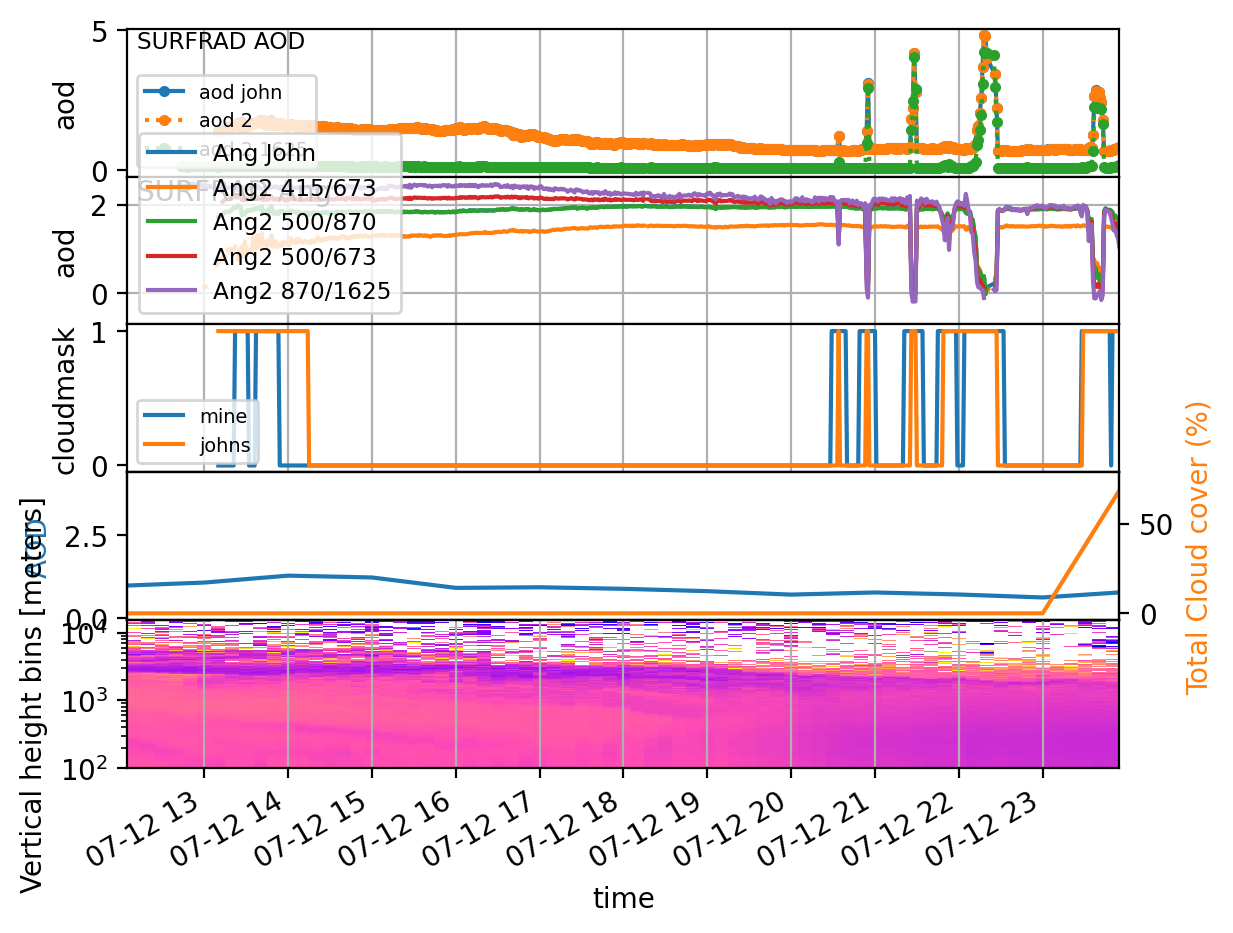

In [13]:
out = self.plot()

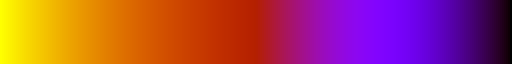

In [36]:
plt.cm.gnuplot_r

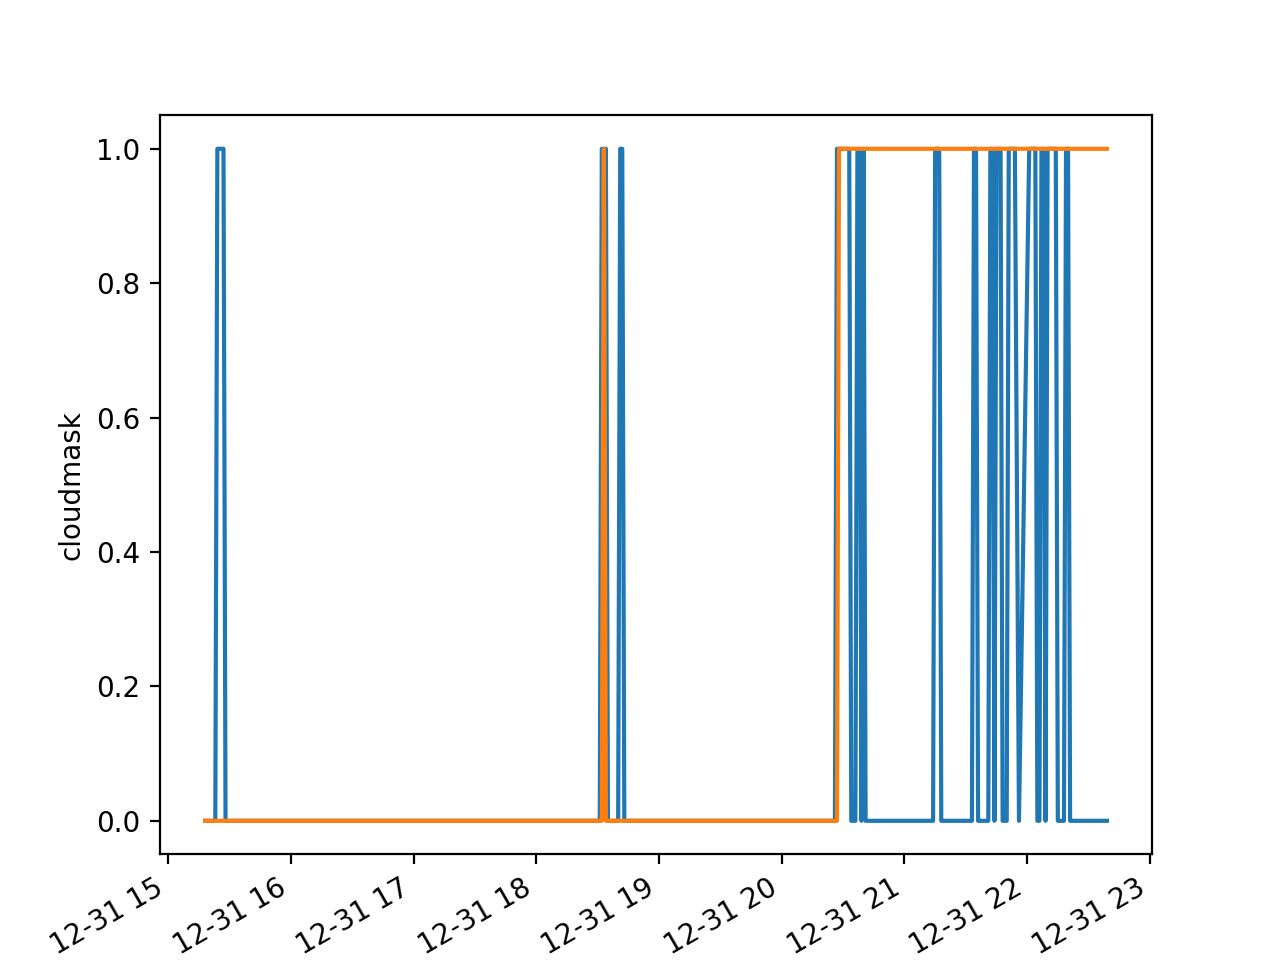

In [56]:
f,a = plt.subplots()
ds.badmask.plot(ax = a)
# ds.badmaskpad.plot(ax = a)
ds.cloudmask.plot(ax = a)

# qc

In [36]:
cont = by_date.Controller(data = data,#Data('/mnt/telg/data/grad/surfrad/aod1625/0.4/tbl/2020/', read_data, plot_data),                        
                        # path2database=path2database,
                        # database_table_name_base='vis_nsascience_quicklooks',
                         )

In [37]:
cont.view.controlls.initiate()

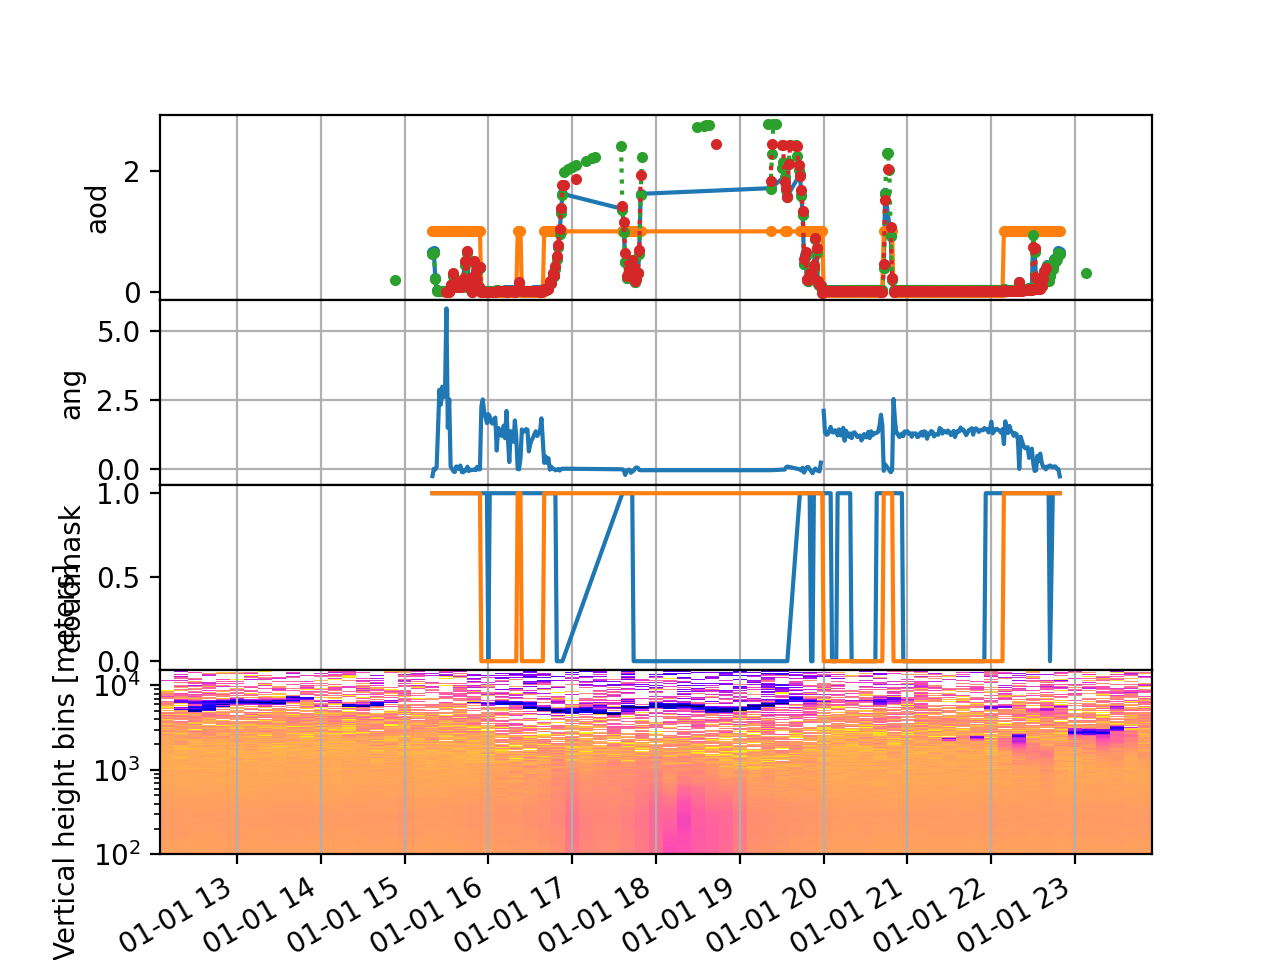

In [38]:
out = cont.view.plot.initiate()

In [18]:
da = self.active_data['aod2']


In [19]:
da

<xarray.Dataset>
Dimensions:                  (channel: 6, datetime: 616, date: 1)
Coordinates:
  * channel                  (channel) int64 1625 415 500 673 870 940
  * datetime                 (datetime) datetime64[ns] 2020-01-06T13:59:00.09...
  * date                     (date) datetime64[ns] 2020-01-06
Data variables:
    od_co2                   (channel, datetime) float32 ...
    od_ch4                   (channel, datetime) float32 ...
    od_h2o                   (channel, datetime) float32 ...
    aod                      (datetime, channel) float32 ...
    od_rayleigh              (channel, datetime) float32 ...
    od_total                 (datetime, channel) float32 ...
    V0                       (date, channel) float32 ...
    sun_earth_distance       (datetime) float32 ...
    sun_earth_V0_correction  (datetime, channel) float32 ...
Attributes:
    site_latitude:       40.12498
    site_longitude:      -105.2368
    site_elevation:      1689
    site_name:           Table Mountain
    site:                tbl
    MFRSR_serial_no:     660
    creation_timestamp:  2022-09-21 17:00:47.920732
    product_version:     0.4

In [48]:
self.active_files.iloc[1]

PosixPath('/mnt/telg/data/grad/surfrad/aod/netcdf/current/tbl/20200102.nc')

In [159]:
da = self.active_data['aod2']
da = da.aod.sel(channel = [500])
da

<xarray.DataArray 'aod' (datetime: 617, channel: 1)>
array([[nan],
       [nan],
       [nan],
       ...,
       [nan],
       [nan],
       [nan]], dtype=float32)
Coordinates:
  * channel   (channel) int64 500
  * datetime  (datetime) datetime64[ns] 2020-01-07T13:59:00.096000 ... 2020-0...

In [160]:
da.where(da != np.inf).max()

<xarray.DataArray 'aod' ()>
array(2.081446, dtype=float32)

In [156]:
da = da.dropna('datetime')

In [131]:
da = da['aod2']

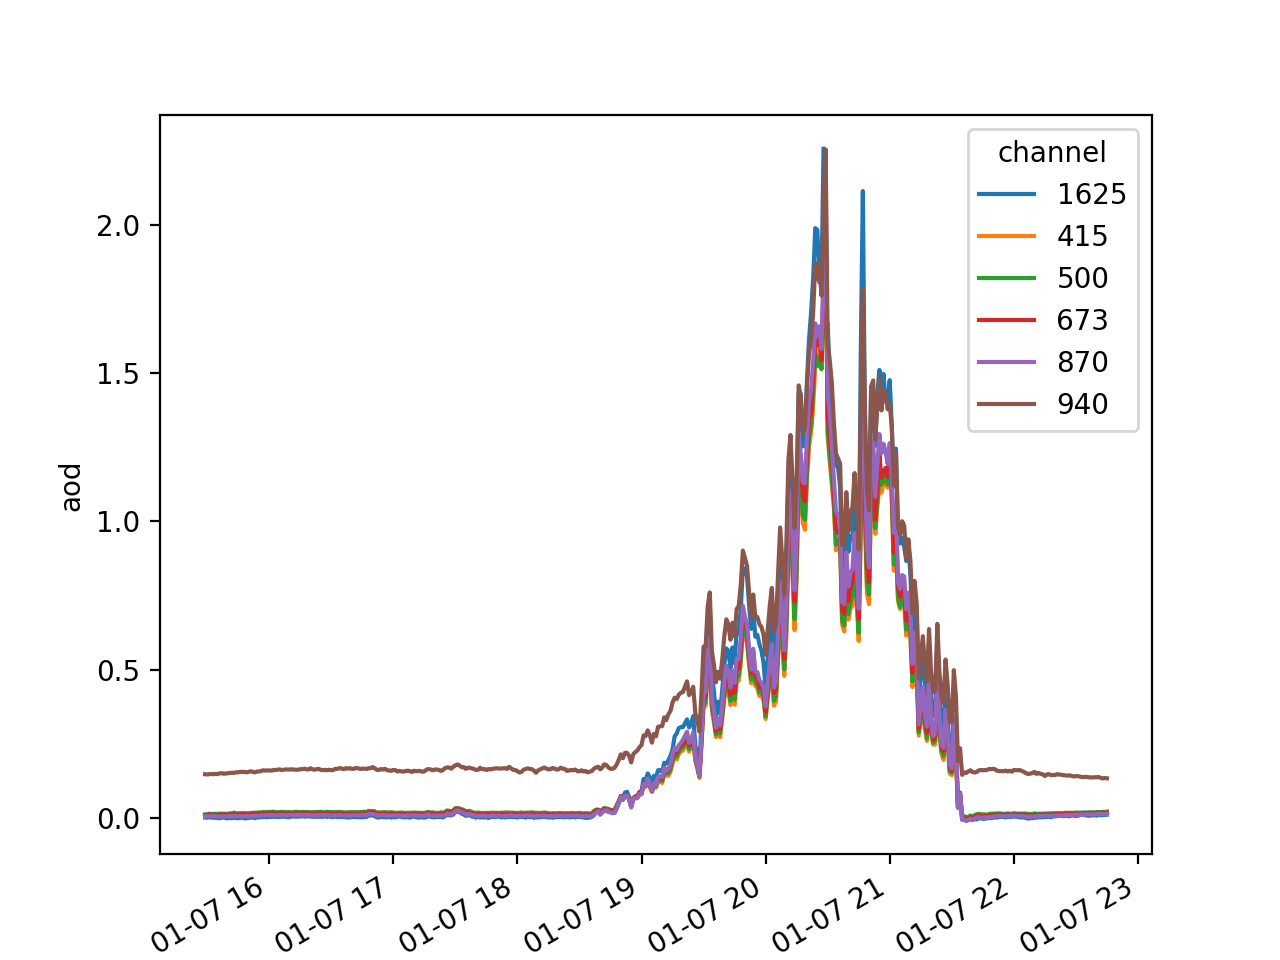

In [140]:
f,a = plt.subplots()
da.aod.dropna('datetime').plot.line(x = 'datetime', ax = a)

In [128]:
da.dropna('datetime')

<xarray.DataArray 'aod' (datetime: 557)>
array([inf, inf, inf, ..., inf, inf, inf], dtype=float32)
Coordinates:
    channel   int64 500
  * datetime  (datetime) datetime64[ns] 2020-01-07T14:28:00.192000 ... 2020-0...

In [ ]:
da.dropna(

In [143]:
float(da.dropna('datetime').aod.max())

inf

In [ ]:
if lmax > 5:
    lmax = 5

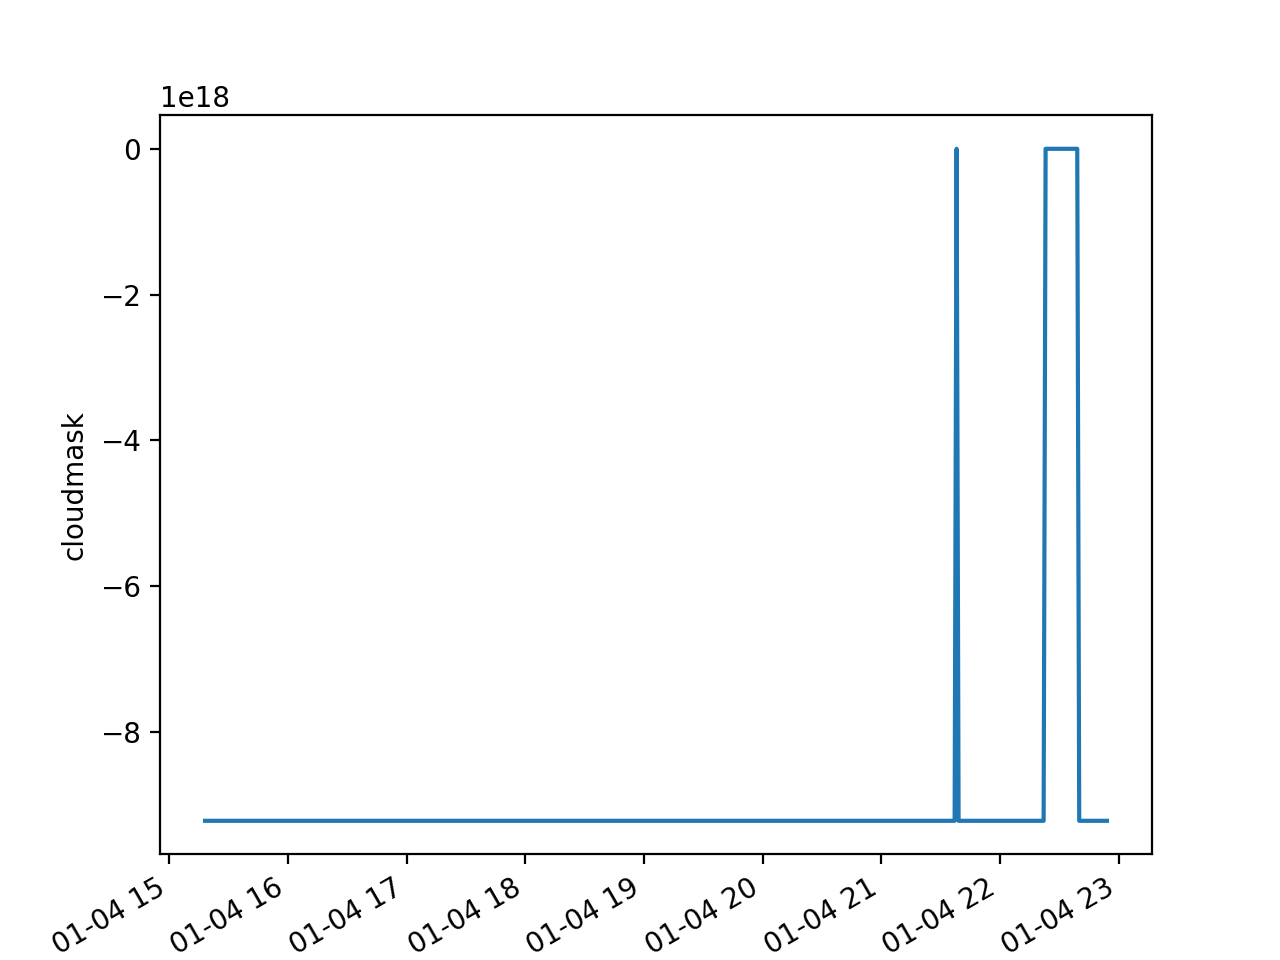

In [22]:
f,a = plt.subplots()
self.active_data['aod1'].
cloudmask.plot(ax = a)

# multiple datasets

## define load and plot functions

In [318]:
path2date = lambda path: pd.to_datetime(path.name.split('_')[-1].split('.')[0])

def read_data(path2file):
    """function that takes the path to the file and returns an object that the plot function can turn into a plot"""
    ds = [xr.open_dataset(p2f) for p2f in path2file]
    return ds

def plot_data(data_object, a, variable = 'aod', selection = {'channel': 500}):
    ls = ['-', ':']
    for e,da in enumerate(data_object):
        if 'channel' in da.coords:
            sel = selection
        else:
            sel = {'wavelength': selection['channel']}
        da[variable].sel(sel).plot(ax = a, ls = ls[e], marker = '.')
        
        if 'cloudmask' in da.variables:
            da['cloudmask'].plot(ax = a, ls = '-', marker = '.')
       

In [319]:
path2date = lambda path: pd.to_datetime(path.name.split('_')[-1].split('.')[0])
path2date(pl.Path('/mnt/telg/data/grad/surfrad/aod1625/0.4/tbl/2018/srf_aod1625_tbl_20180101.nc'))

Timestamp('2018-01-01 00:00:00')

## doit

In [320]:
reload(by_date)
# reload(quicklooks)

<module 'qclib.by_date' from '/mnt/telg/prog/qclib/qclib/by_date.py'>

In [328]:
'/nfs/iftp/aftp/g-rad/surfrad/ceilometer/cl51_cloud_prod_lev0/tbl/2020/'

'/nfs/iftp/aftp/g-rad/surfrad/ceilometer/cl51_cloud_prod_lev0'

In [321]:
data = by_date.Data(['/mnt/telg/data/grad/surfrad/aod1625/0.4/tbl/2020/','/mnt/telg/data/grad/surfrad/aod/netcdf/current/tbl/'], path2date, read_data, plot_data)

In [322]:
da = data.active_data[1]

In [323]:
da

<xarray.Dataset>
Dimensions:               (datetime: 224, wavelength: 5, criteria: 1)
Coordinates:
  * datetime              (datetime) datetime64[ns] 2018-01-01T18:55:00 ... 2...
  * wavelength            (wavelength) int64 415 500 673 870 1625
  * criteria              (criteria) object 'deriv'
Data variables:
    aod                   (datetime, wavelength) float32 ...
    ang                   (datetime) float32 ...
    badmask               (datetime, criteria) int64 ...
    badmaskpad            (datetime, criteria) int64 ...
    minutes2bad_angstrom  (datetime, criteria) int64 ...
    cloudmask             (datetime) int64 ...
Attributes:
    version:  0.3

{'thisone': {'a': <AxesSubplot:xlabel='datetime', ylabel='cloudmask'>}}

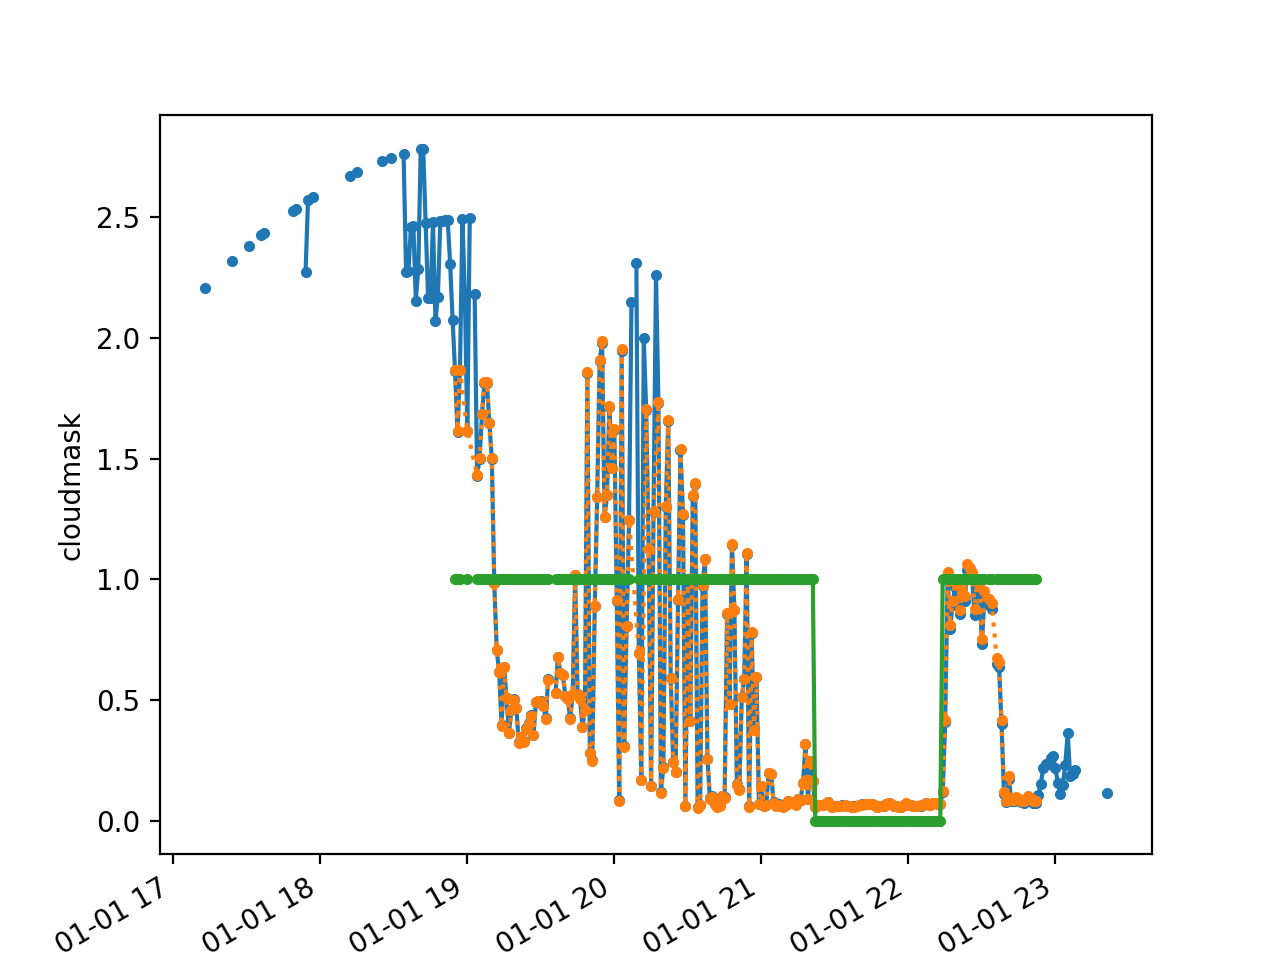

In [324]:
data.plot()

In [325]:
cont = by_date.Controller(data = data,#Data('/mnt/telg/data/grad/surfrad/aod1625/0.4/tbl/2020/', read_data, plot_data),                        
                        # path2database=path2database,
                        # database_table_name_base='vis_nsascience_quicklooks',
                         )

In [326]:
cont.view.controlls.initiate()

[<AxesSubplot:xlabel='datetime', ylabel='cloudmask'>]

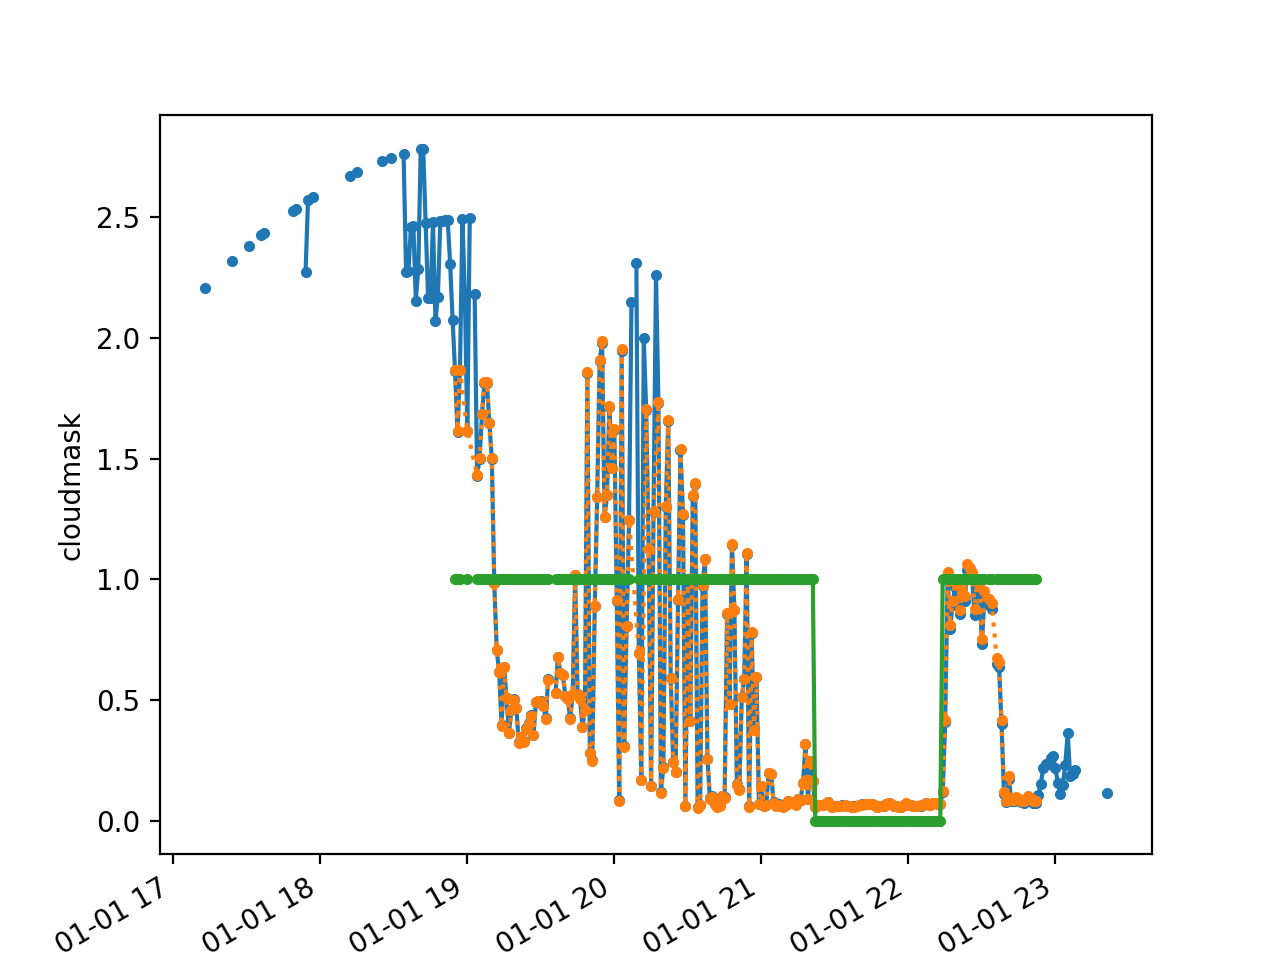

In [327]:
cont.view.plot.initiate()

# Simple

## define load and plot functions

In [203]:
path2date = lambda path: pd.to_datetime(path.name.split('_')[-1].split('.')[0])

def read_data(path2file):
    """function that takes the path to the file and returns an object that the plot function can turn into a plot"""
    ds = xr.open_dataset(path2file)
    return ds

def plot_data(data_object, a, variable = 'aod', selection = {'channel': 500}):
    data_object[variable].sel(selection).plot()
       

## doit

In [257]:
reload(by_date)
# reload(quicklooks)

<module 'qclib.by_date' from '/mnt/telg/prog/qclib/qclib/by_date.py'>

In [258]:
data = by_date.Data('/mnt/telg/data/grad/surfrad/aod1625/0.4/tbl/2020/', path2date, read_data, plot_data)

{'thisone': {'a': <AxesSubplot:title={'center':'channel = 500'}, xlabel='datetime', ylabel='aod'>}}

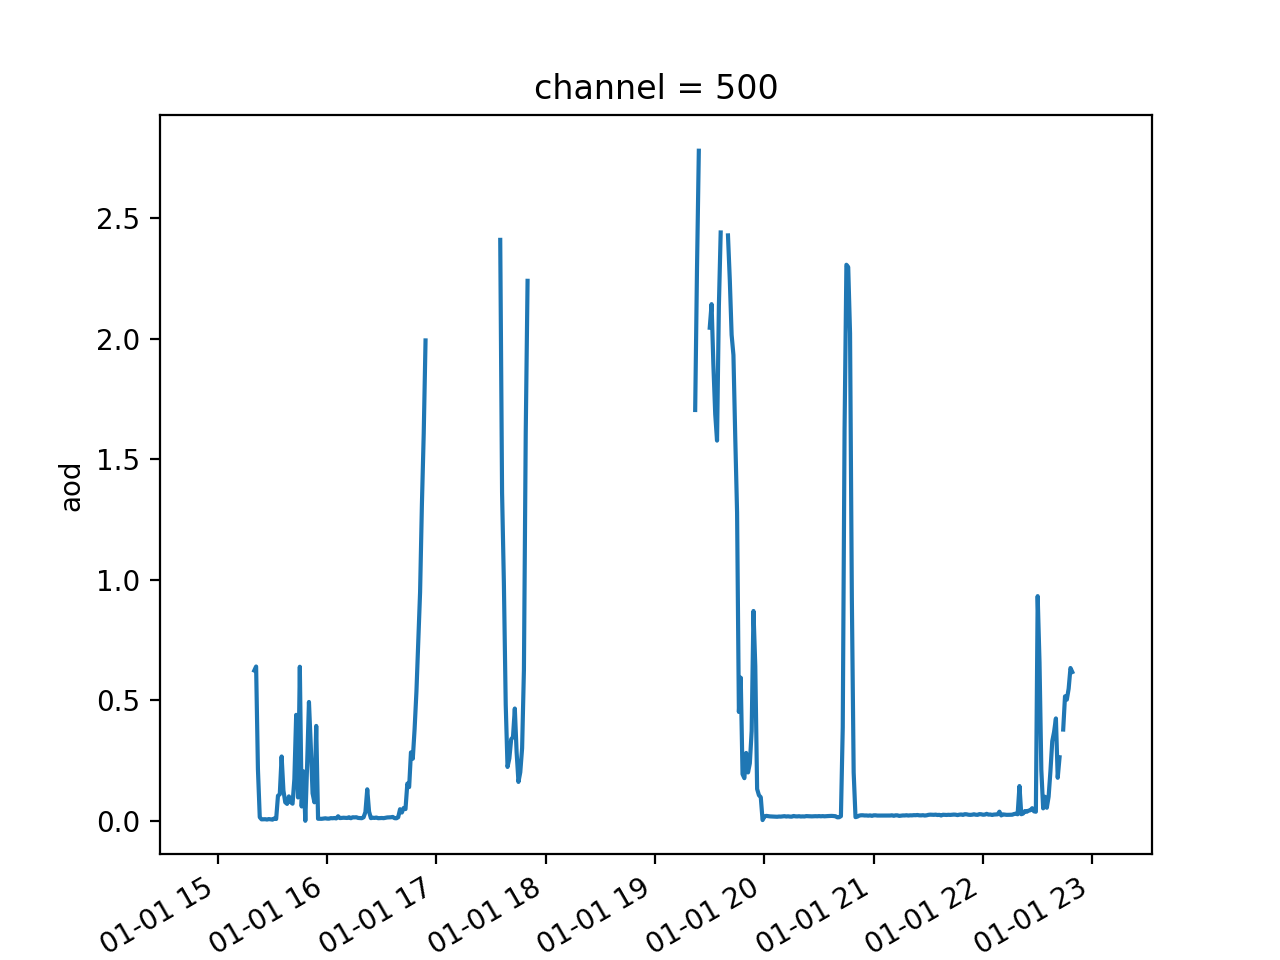

In [259]:
data.plot()

In [260]:
cont = by_date.Controller(data = data,#Data('/mnt/telg/data/grad/surfrad/aod1625/0.4/tbl/2020/', read_data, plot_data),                        
                        # path2database=path2database,
                        # database_table_name_base='vis_nsascience_quicklooks',
                         )

In [261]:
cont.view.controlls.initiate()

[<AxesSubplot:title={'center':'channel = 500'}, xlabel='datetime', ylabel='aod'>]

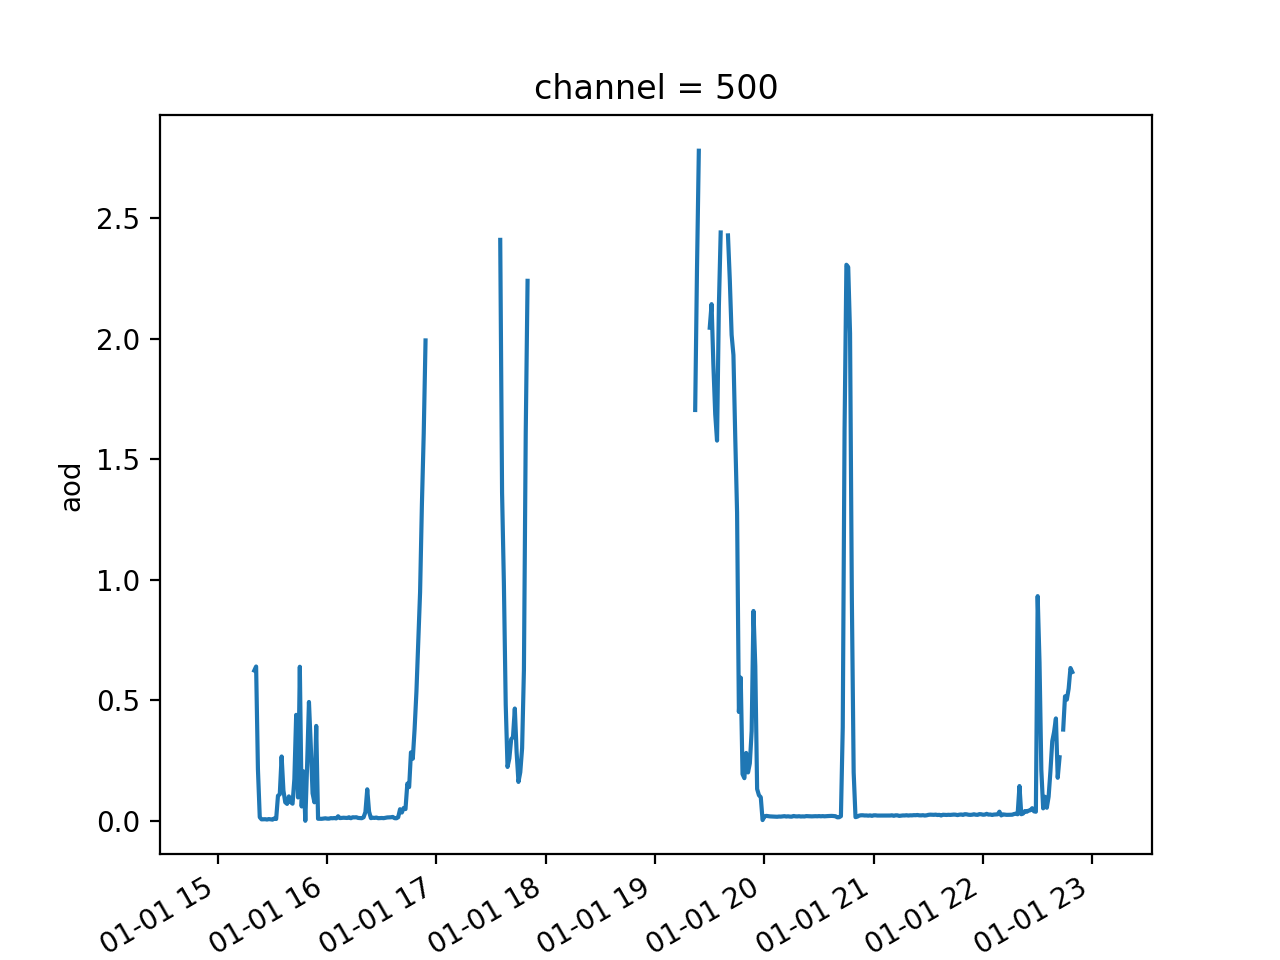

In [262]:
cont.view.plot.initiate()

In [252]:
cont.view.controlls.date_picker.value

Timestamp('2020-01-01 00:00:00')